# **Hit Song Attributes**

# Project: Milestone 5

## Merging the Data and Storing in a Database/Visualizing Data

Amelia Farrell

DSC540

5/14/23

In [1]:
# Connecting to google drive
from google.colab import drive 
drive.mount('/content/drive')

# Change to the google drive directory
%cd /content/drive/MyDrive/Colab\ Notebooks/DSC540/FinalProject

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Colab Notebooks/DSC540/FinalProject


In [2]:
# importing libraries needed
import sqlite3
import pandas as pd
import numpy as np

## Step 1: SQL Lite Connections

Now that we have idenifyed or goal, found our data sets, cleaned/formated each, we will load each into a SQLLite database. From there, we can combine the data sets into one for analysis.

In [8]:
# creating a SQLite connection for the final database
conn = sqlite3.connect('final_database.db')

In [9]:
# loading the final flat file a DataFrame
flat_file_final = pd.read_csv('flat_file_final.csv')
# writing DataFrame to SQLite table
flat_file_final.to_sql('flattable', conn, index=False)

39987

In [10]:
# loading the final file a DataFrame
web_data_final = pd.read_csv('web_data_final.csv')
# writing DataFrame to SQLite table
web_data_final.to_sql('webtable', conn, index=False)

77

In [11]:
# loading the final file a DataFrame
API_data_final = pd.read_csv('API_data_final.csv')
# writing DataFrame to SQLite table
API_data_final.to_sql('apitable', conn, index=False)

77

## Step 2: Final SQL Lite Database 

Combining our we SQLLite databases into one.

In [12]:
# creating a SQLite connection for our final database
conn = sqlite3.connect('final_database.db')

# SQL query to join the tables
query = '''
SELECT *
FROM webtable
JOIN apitable ON webtable.spotify_id = apitable.spotify_id
JOIN flattable ON webtable.spotify_id = flattable.spotify_id
'''

# executing the abouve query and fetch the result into a DataFrame
result = pd.read_sql_query(query, conn)

# closing the connection to our SQLite database
conn.close()

# display the joined dataset
print(result)

                   song_name                       song_artist  \
0                sugar shack    jimmy gilmer and the fireballs   
1               sugar, sugar                       the archies   
2                   hey jude                       the beatles   
3        tossin' and turnin'                       bobby lewis   
4   i want to hold your hand                       the beatles   
..                       ...                               ...   
77                   tik tok                             kesha   
78               uptown funk  mark ronson featuring bruno mars   
79               uptown funk  mark ronson featuring bruno mars   
80                levitating                          dua lipa   
81                heat waves                     glass animals   

                              spotify_id                               uid  \
0   spotify:track:2nAR2OjaGIXesjm7Kq7Kzu  84ec21311fc6b78aa0d04b4f5d6e37d0   
1   spotify:track:3iSws76HjaU7k49EqJVTfF  43c6d0a20

## Step 3: Summary of our final dataset 

Now that we have combined our we SQLLite databases into one and loaded it into a dataframe, lets ensure we have the number of expected rows and columns and remove anything that is not needed for our final anaylsis

In [13]:
# checking number of rows
# we want to ensure that our SQL join did not being the extra 3000+ rows from the flat file that we do not need
len(result)

82

In [14]:
# removing any spotify_id	columns, as these are no longer needed in our final dataset
finaldataframe = result.drop([col for col in result.columns if 'id' in col], axis=1)

In [15]:
# viewing header of final dataset
finaldataframe.head()

,song_name,song_artist,year,song_name,song_artist,album_release_date,album_name,album_release_month,album_release_year,Hit?,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections
0,sugar shack,jimmy gilmer and the fireballs,1963,sugar shack,jimmy gilmer and the fireballs,05/01/63,Clovis Classics: The Definitive Collection,May,1963.0,Hit,...,0.1830,0.2210,0.000279,0.104,0.805,132.382,121800.0,4.0,34.23680,8.0
1,"sugar, sugar",the archies,1969,"sugar, sugar",the archies,11/07/69,"The Very Best Of ""The Archies""",November,1969.0,Hit,...,0.0278,0.4660,0.000000,0.108,0.967,122.395,167187.0,4.0,34.20599,9.0
2,hey jude,the beatles,1968,hey jude,the beatles,08/01/68,1 (Remastered),August,1968.0,Hit,...,0.0261,0.0112,0.000014,0.088,0.532,147.207,425653.0,4.0,26.10728,21.0
3,tossin' and turnin',bobby lewis,1961,tossin' and turnin',bobby lewis,12/01/60,Tossin' and Turnin',December,1960.0,Hit,...,0.0393,0.2250,0.000000,0.108,0.965,142.736,159640.0,4.0,51.05837,8.0
4,i want to hold your hand,the beatles,1964,i want to hold your hand,the beatles,12/01/63,1 (Remastered),December,1963.0,Hit,...,0.0476,0.3860,0.000000,0.311,0.866,130.726,145747.0,4.0,27.48807,8.0


In [16]:
# summary statistics
summary_stats = finaldataframe.describe()
print(summary_stats)

              year  album_release_year  danceability     energy        key  \
count    82.000000           80.000000     51.000000  51.000000  51.000000   
mean   1984.536585         1983.637500      0.659157   0.609204   4.901961   
std      22.186747           22.287673      0.182270   0.201579   3.528484   
min    1946.000000         1945.000000      0.149000   0.026400   0.000000   
25%    1966.000000         1965.750000      0.548000   0.487500   1.500000   
50%    1984.500000         1983.500000      0.675000   0.628000   5.000000   
75%    2003.750000         2003.250000      0.822500   0.760000   7.000000   
max    2022.000000         2020.000000      0.918000   0.989000  11.000000   

        loudness       mode  speechiness  acousticness  instrumentalness  \
count  51.000000  51.000000    51.000000     51.000000         51.000000   
mean   -8.363922   0.764706     0.072010      0.241851          0.008978   
std     3.630297   0.428403     0.075484      0.261185          0.038

## Step 4: Visualizations

We will be creating 5 visulizations in Tableau and pulling them back into our Juptier Notebook. 

Why did we choose Tableau instead of creating visuals with Seabron in Python  or ggplot in R? While this would have allowed us to create the visuls within our code, we choose Tableau due to its ability to add details on specific points within the visual itself. Meaning that we can create a visual, highlight over a point of intrest and see the details that lay beneath without having to create another visual or extra data table. 

The visulizations to help us understand how the attributes of hit songs of the past years. This will us see if song prefences have changed over time and what we should include to create the next hit.

In [17]:
# since we will be creating visualizations using tableau
# we are going to save the final dataset as a csv to connect to tableau
finaldataframe.to_csv('final.csv', index=False)

Chart 1: Release Year vs. Hit Year  Correlation

We will first be looking at how the Release Year of the Song's Album relates to the year it hit number one on the bilboard.Before creating this visual, we will calulate the correlation coefficient for Release Year and Hit Year

In [18]:
# selecting Release Year vs. Hit Year to run correlation
Years = finaldataframe[['album_release_year', 'year']]
# correlation matrix using numpy
Years.corr()

,album_release_year,year
album_release_year,1.000000,0.999389
year,0.999389,1.000000


Based on the above (R = .99) we can say that there is a very strong (almost perfect) positive correlation between the year the song was released and the year it made number one hit.

In [19]:
# what was the avarage number of years between the release year and hit year?
PopulatiryLag = (Years["year"] - Years["album_release_year"])
lag_mean = PopulatiryLag.mean()
print("The mean number of years between release year and hit year is", lag_mean)

The mean number of years between release year and hit year is 0.475


In [20]:
# what was the mediumn number of years between the release year and hit year?
lag_median = PopulatiryLag.median()
print("The median number of years between release year and hit year is", lag_median)

The median number of years between release year and hit year is 0.0


The above is good  news for artists! On avarage, it takes 0.475 years for a song to hit number 1 once it is released. But this avarage was likley driven up by outlires, as the median number of years is 0! Lets take a closer look at this correlation by creating a scatter plot in Tableau.



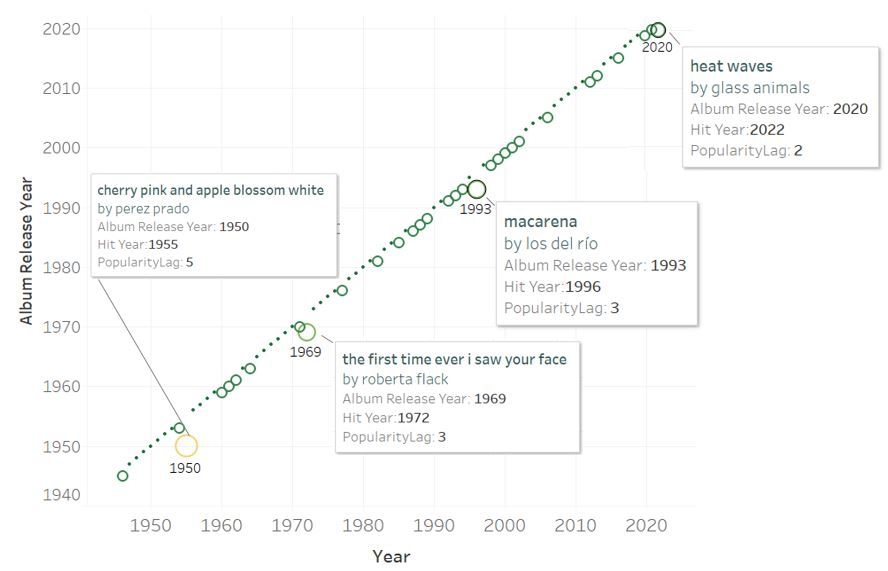

Our scatter plot clearly shows the high correlation between the song release year and hit year. We can also see the outliers as the larger yellow circles. Since Tableau enables us to use, shapes, colors, & sizes, to show attributes of data, it makes it easy to identify the outliers here. We can also hover over the individual data points to see the details on the songs that are driving up our average.

Lets take a closer look at the song that took 5 years (lower left on the chart) to make it to number one. According to Wikipedia, "Cherry Pink and Apple Blossom White" didn’t actually get released in the United States until 1954, becoming a hit there in 1955 (Wikipedia contributors, 2023). Our data shows a 5 year lag between release and hit year due to the song being first written in French in 1950, later released in Mexico in 1953, then finally hitting the U.S. in 1954. Bring this song closer to the medium. 


Chart 2 & 3: Song Attributes vs. Hit Year

Now that we understand that most songs become number 1 within the year they were released. Lets look at how the different song attributes relate. 

How do we know what attributes to look at?
To find out how the different song attributes relate to hit year, we will run a correlation for all. Once we identify the strongest relationships, we will visualize them to find out more.


In [21]:
corr_all = finaldataframe.corr()
corr_all["year"]

<ipython-input-21-1c874515e6c4>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_all = finaldataframe.corr()


year                  1.000000
album_release_year    0.999389
danceability          0.406955
energy                0.098657
key                   0.055962
loudness              0.440045
mode                 -0.076820
speechiness           0.399688
acousticness         -0.217615
instrumentalness     -0.153409
liveness             -0.001059
valence              -0.158019
tempo                -0.010679
duration_ms           0.012895
time_signature        0.179452
chorus_hit           -0.019496
sections             -0.121644
Name: year, dtype: float64

Other than release year, it looks like song loudness and danceability had the strongest relationship to hit year. Indicating that there may be a trend worth looking into. 

Lets look at loudness first with .44 correlation coefficient.

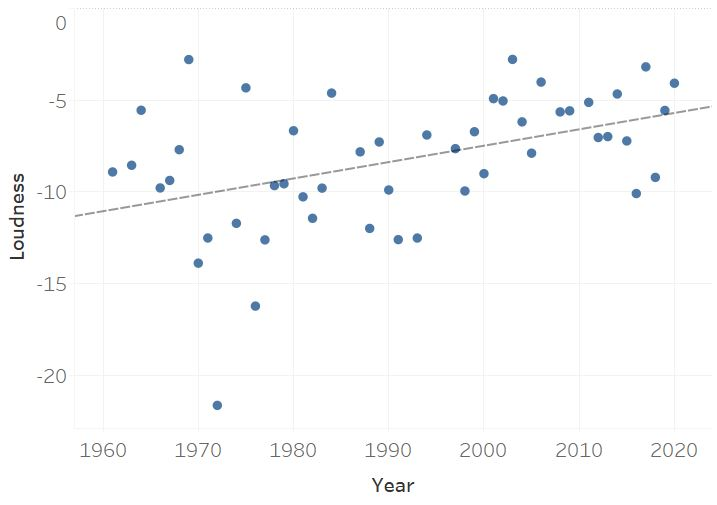

Next, we can look at danceability (.40 correlation coefficient).

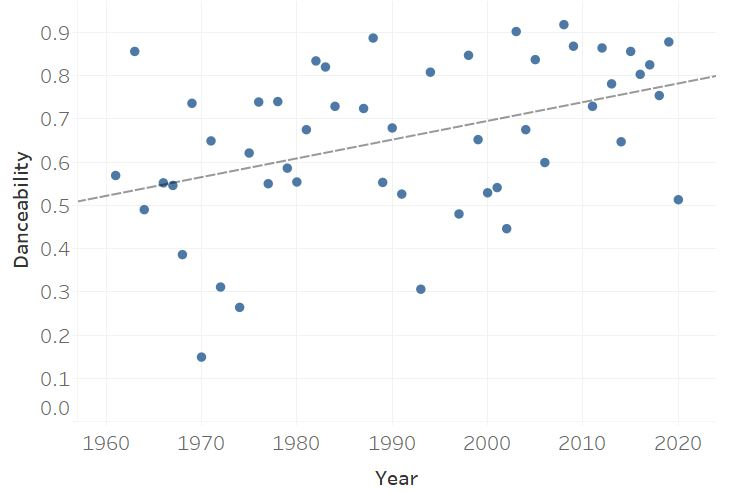

Once we add the trendline to our chart, you can clearly see the positive relationship between hit year for loudness and danceability. Based on this, we can assume that loud and danceable songs have been increasing in popularity between 1960 and 2020. 

It is important to note that the measurement for loudness and danceability is calculated by Spotify. More detail on how this is calculated can be found here:
https://developer.spotify.com/documentation/web-api/reference/get-audio-features

Chart 4 & 5: Song Loudness

Now that we know there is a relationship between song loudness and the year it was released, how do all the other songs that didn't make it to the top charts compare? 
To compare, lets take a look at the disrtubtion on the hit songs vs all songs.

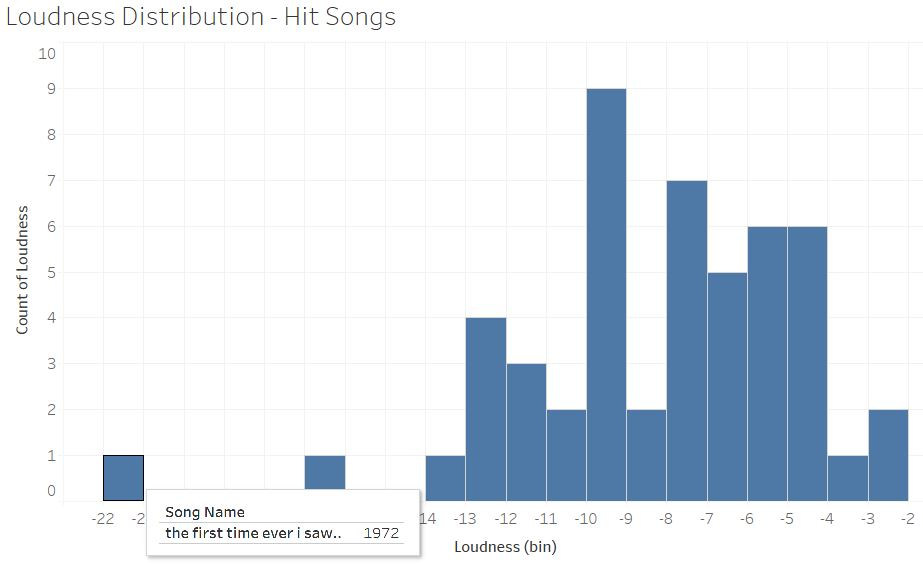

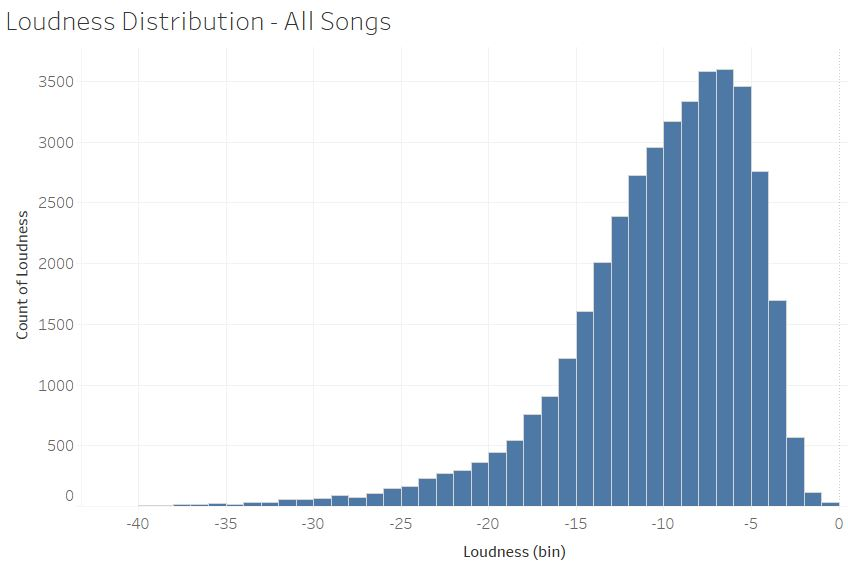

Based on the distributions, we can see that a majority of songs from both data sets sit between -10 and -9 for loudness.

However, this view makes it difficut to see where the true median is. Lets calcuate this below.

In [22]:
TopSongLoadness = finaldataframe['loudness']
TopSongLoadness.median()

-7.818

In [23]:
AllSongsLoadness = flat_file_final['loudness']
AllSongsLoadness.median()

-9.250499999999999

Given that the median loudness of the Top Songs is slightly higher than the median loudness of all songs. It may be worth calcuating the P-Value to see if the relationship is significant.

Chart 6,7, & 8: Clustering

Now that we know that song loadness is higher in hit songs and dancabiliy has increased over the years for hit songs. Is higher loadness and dancabiliy the key to making a hit song? If we take all songs, plot them on loadness and dancabiliy, would we see them all grouped together away from all other "failed" songs?

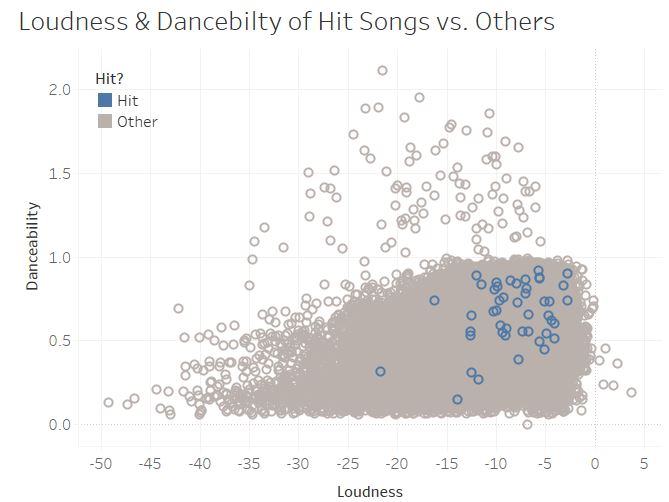

Our cluster above shows that the Hit Songs (in Blue) are clustered together. However, you can also see that there are many other "failed" songs (in Grey) surrounding our Hits. Meaning that just increasing loadness and dancabiliy will not guarantee a hit.

Next lets look at another two simlar variables that may show how our Hit Songs stand out.

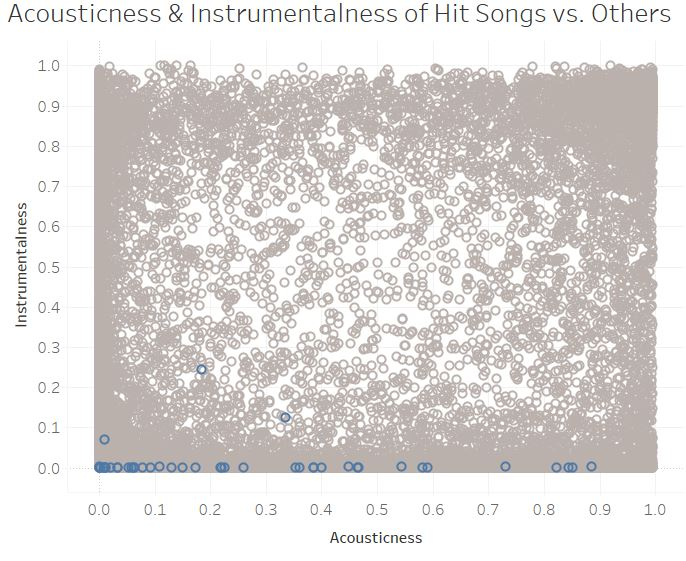

We can see another similar pattern for instrumentalness but not so much for acousticness.

Given that instrumentalness, danceabilty, and loadness appear to have an impact on whether or not a song makes it as the Top Hit of the year. We will summarize this relationship in the visulation below.

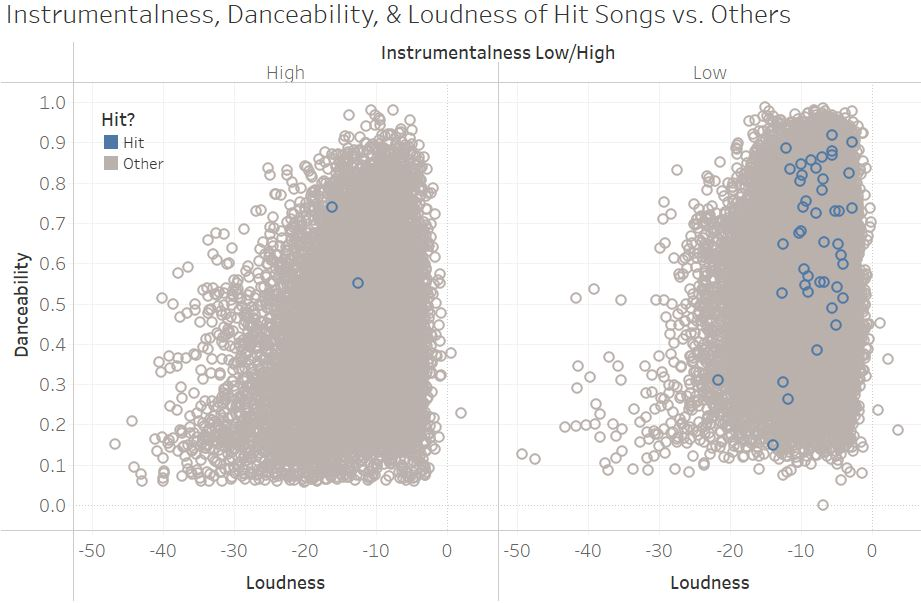

## Step 5: Take aways

**Summary**
This project took a closer look at the Top Songs in the USA from 1960 to 2020. With a focus on music attributes, date of release, and how they compare to songs that did not make it to the top charts. We went into this analysis with the goal of better understanding where music is headed in the USA and if/what attributes make or break a song. I have learned a lot over the course of this analysis and would take a different approach if we ran through the process again.

**Approach**
To address our main question “what attributes make or break a song” we pulled a list of the top US song by year from Wikipedia. We then brought in data on the song’s attributes from a flat file and date of release from an API. If we did the analysis again, I would still want to pull in the same data but make the large flat file the focus. Meaning that we would start with the flat file containing all songs released in the US from 1960 to 2020 and pull in the Top Hits list, flagging which songs made number 1 for each year. This would make all released songs the focus but with an added binary column. While we were still able to view the other songs from the flat file in this analysis, we had to flag them as “Hit” or “Other” within Tableau, adding more work when this could have been incorporated in our initial data clean up. I would have also liked to include a popularity measure for the remaining songs. Rather than only having a binary (Hit or Not Hit), a measure such as number of plays across platforms (Spotify, YouTube, Pandora, Apple Music) by year would have been very helpful when running correlation coefficients against song attributes.
I believe our analysis did give some insights as to what attributes may help increase the chances of a song making it to number one. We saw that instrumentalness, danceability, and loadness have a relationship to whether or not a song makes it as the Top Hit of the year. We also saw that both danceability and loudness of Hit Songs have increased slightly over the years. However, I there is a lot more that could be done and many other insights to be uncovered.  
For one, if we include all songs we could run a classification model (such as Logistic Regression or SVM) to see what song attributes have the highest chance of making a song a “Hit”. If we included a popularity measure for all songs, we would also be able to run a simple linear regression to see what song attributes are the most significant. There is are also plenty of other visualizations we would create such as Box plots for each song attribute and a heat map showing how each are correlated to one another. There is so much more than can be uncovered and I hope to have time in the near future to do just that. 

**Ethical Implications**
Given that our analysis focusses on a short list of Songs that Hit number 1 for the in the US, I believe it increases the chances of our analysis breaching the ‘Outcomes’ principle from the “5 Principles of Data Ethics for Business, 2021”. The ‘Outcomes’ principle is related to “inadvertent harm to individuals or groups of people” (5 Principles of Data Ethics for Business, 2021). Meaning that the outcome of our analysis could have an adverse impact or favor certain groups over others. You may ask, how could the current analysis breach this principle? It is simple song data? While it may sound harmless, you cannot control how your data/analysis will be viewed, interpreted, or used by others. Since our analysis only looks to see if a song was the most popular for a given year, we are missing the top songs for minority groups. An example would be people that love classical music. Since our Hit List only includes Pop Songs, we are completely ignoring this group. To this group, Across the Stars conducted by John Williams, may be number one in 2019. The same can be said for those who only listen to music in another language. A good way to address this problem in the analysis, would be to add music genre and include a separate analysis for each. While this would add a lot more work on our end, it would create a more meaningful analysis and help more than just Pop artists. By showing the relationship between song attributes and popularity for genre, artists from each could use the analysis to view trends and make informed decisions if they are looking to reach the top charts. 


***References***

*Wikipedia contributors. (2023). Cherry Pink (and Apple Blossom White). Wikipedia. https://en.wikipedia.org/wiki/Cherry_Pink_(and_Apple_Blossom_White)*

*5 Principles of Data Ethics for Business. (2021, March 16). Business Insights Blog. https://online.hbs.edu/blog/post/data-ethics*